# Assignment 5 Dataset:

Use USF logo Images dataset for this assignment. You will have a chance to explore more on Convolution Neural Networks(CNNs) in this Assignment.

# Dataset description:

USF logo Images dataset is madeup from google images containing both old and new USF logos. This dataset contains two folders(Old logo and new logo) contains 100 images in total(50 each for each type).

# Task
Your task is to build a classifer where it can classify USF old logo or new logo given an image. you just have to build one good model
 


# 1 Load the two folders USF old and USF new to the environment

In [1]:

import numpy as np
import os
import cv2
import random as rn
import glob
from tensorflow import keras
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
 

# 1. loading data 
# 2.labling as new and old
# 3. resizing it 90 by 90

In [2]:
DATADIR = r"C:\Users\nitin\OneDrive\Documents\Assignment 5\Assignment 5"
CATEGORIES = ["new", "old"]
Data =[]
labels = []
def create_train_Data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
#         label = CATEGORIES.index(category)
        label = category
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
                img_array = cv2.resize(img_array, (90,90))   # resize image 
                Data.append(img_array)
                labels.append(label)
            except Exception as e:
                pass
            
create_train_Data()  

In [3]:
print (len(Data))

200


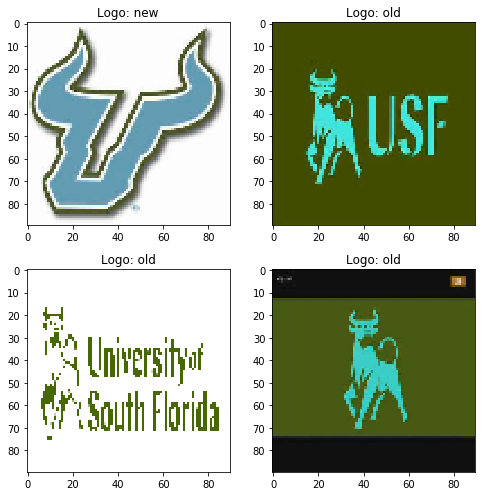

In [4]:
fig,ax=plt.subplots(2,2)
fig.set_size_inches(7,7)

for i in range(2):
    for j in range (2):
        l=rn.randint(0,len(labels))
        ax[i,j].imshow(Data[l])
        ax[i,j].set_title('Logo: '+labels[l])
        
plt.tight_layout()

# Create a stratified split based on the labels(80:20 split)

# Normalize the data

In [5]:
le=LabelEncoder()
#normalize
image_x = np.array(Data)
image_x=image_x/255

image_y=le.fit_transform(labels)
image_y=to_categorical(image_y,2)
#Convert to integer
image_y = image_y.astype(int)
image_x.dtype

dtype('float64')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(image_x, image_y,stratify = image_y, 
                                                    test_size=0.2,random_state=42, shuffle = True)



# Split training data into train / validation sets (20 validation / keep remaining 140 for training)
(x_train, x_valid) = x_train[20:], x_train[:20]
(y_train , y_valid) = y_train[20:], y_train[:20]

# Reshape the input data to a tensor(4d) for CNN

In [7]:
#Print train data and test data shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (140, 90, 90, 3) y_train shape: (140, 2)
x_test shape: (40, 90, 90, 3) y_test shape: (40, 2)


In [8]:
 #Reshape the dimensions
x_train = x_train.reshape(x_train.shape[0], 90, 90, 3)
x_test = x_test.reshape(x_test.shape[0], 90, 90, 3)

# Build a CNN Classifier mode

In [9]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(90,90,3))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 90, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0

In [10]:
# initiate adam optimizer
opt = keras.optimizers.Adam(lr=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
from keras.callbacks import ModelCheckpoint

# Training of the model
checkpointer = ModelCheckpoint(filepath='model_best_weights.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train,
         y_train,
         batch_size=5,
         epochs=15,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/15
27/28 [===========================>..] - ETA: 0s - loss: 0.7182 - accuracy: 0.5926
Epoch 00001: val_loss improved from inf to 0.57278, saving model to model_best_weights.hdf5
28/28 [==============================] - 1s 52ms/step - loss: 0.7187 - accuracy: 0.5929 - val_loss: 0.5728 - val_accuracy: 0.9000
Epoch 2/15
27/28 [===========================>..] - ETA: 0s - loss: 0.6579 - accuracy: 0.6741
Epoch 00002: val_loss improved from 0.57278 to 0.54020, saving model to model_best_weights.hdf5
28/28 [==============================] - 1s 46ms/step - loss: 0.6446 - accuracy: 0.6857 - val_loss: 0.5402 - val_accuracy: 0.9000
Epoch 3/15
27/28 [===========================>..] - ETA: 0s - loss: 0.4609 - accuracy: 0.8074
Epoch 00003: val_loss improved from 0.54020 to 0.49646, saving model to model_best_weights.hdf5
28/28 [==============================] - 1s 46ms/step - loss: 0.4687 - accuracy: 0.8071 - val_loss: 0.4965 - val_accuracy: 0.7000
Epoch 4/15
28/28 [==========================

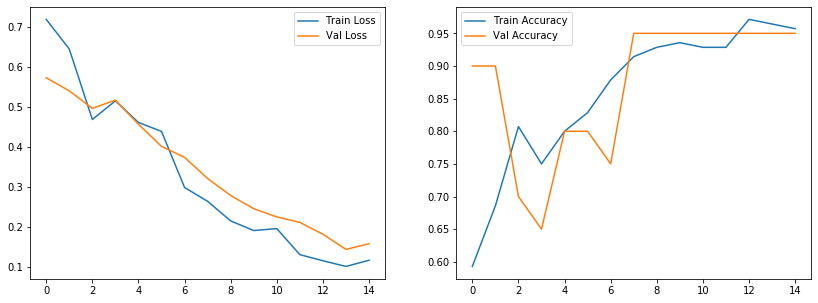

In [12]:

%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Val Accuracy')
ax2.legend()

In [13]:
#Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print('Test Loss : {:.4f}'.format(score[0]))


 Test accuracy: 0.925000011920929
Test Loss : 0.1690


# improve it by tuning the hyper parameters

In [14]:
model1 = Sequential()

model1.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(90,90,3))) 
model1.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model1.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.3))

model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax'))

# Print the model summary
model1.summary()

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 90, 90, 64)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [15]:
# initiate adam optimizer
opt = keras.optimizers.Adam(lr=0.0001)

# Let's train the model using RMSprop
model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint

# Training of the model
checkpointer = ModelCheckpoint(filepath='model_best_weights.hdf5', verbose = 1, save_best_only=True)
history1 = model1.fit(x_train,
         y_train,
         batch_size=6,
         epochs=25,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/25
23/24 [===========================>..] - ETA: 0s - loss: 0.5901 - accuracy: 0.6812
Epoch 00001: val_loss improved from inf to 0.46727, saving model to model_best_weights.hdf5
24/24 [==============================] - 1s 48ms/step - loss: 0.5895 - accuracy: 0.6786 - val_loss: 0.4673 - val_accuracy: 0.8000
Epoch 2/25
23/24 [===========================>..] - ETA: 0s - loss: 0.3920 - accuracy: 0.8333
Epoch 00002: val_loss improved from 0.46727 to 0.35125, saving model to model_best_weights.hdf5
24/24 [==============================] - 1s 45ms/step - loss: 0.3900 - accuracy: 0.8357 - val_loss: 0.3513 - val_accuracy: 0.8500
Epoch 3/25
23/24 [===========================>..] - ETA: 0s - loss: 0.2947 - accuracy: 0.8841
Epoch 00003: val_loss improved from 0.35125 to 0.27672, saving model to model_best_weights.hdf5
24/24 [==============================] - 1s 47ms/step - loss: 0.2970 - accuracy: 0.8786 - val_loss: 0.2767 - val_accuracy: 0.9000
Epoch 4/25
23/24 [==========================

In [17]:
#Evaluate the model on test set
score = model1.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print('Test Loss : {:.4f}'.format(score[0]))


 Test accuracy: 1.0
Test Loss : 0.0030


I changed no of epoch from 15 to 25 and batch size from 5 to 6 and my model accuracy got increased from  92% and loss from .18 to accuracy 100% means 100 predicting correctly images as new and old
test loss also decreased to .0021.

# Explaining what every layer does why was it constructed the way it is

There are two main parts to a CNN:
1.	A convolution tool that splits the various features of the image for analysis
2.	A fully connected layer that uses the output of the convolution layer to predict the best description for the image

CNN architecture is inspired by the organization and functionality of the visual cortex and designed to mimic the connectivity pattern of neurons within the human brain.
The neurons within a CNN are split into a three-dimensional structure, with each set of neurons analyzing a small region or feature of the image. In other words, each group of neurons specializes in identifying one part of the image. CNNs use the predictions from the layers to produce a final output that presents a vector of probability scores to represent the likelihood that a specific feature belongs to a certain class.

How a Convolutional Neural Network Works━
A CNN is composed of several kinds of layers:
Convolutional layer creates a feature map to predict the class probabilities for each feature by applying a filter that scans the whole image, few pixels at a time.

Features: CNNs compare images piece by piece. The pieces that it looks for are called features. By finding rough feature matches in roughly the same positions in two images, CNNs get a lot better at seeing similarity than whole-image matching schemes.
each feature is like a mini-image—a small two-dimensional array of values. Features match common aspects of the images. In the case of X images, features consisting of diagonal lines and a crossing capture all the important characteristics of most X’s. These features will probably match up to the arms and center of any image of an X. When presented with a new image, the CNN doesn’t know exactly where these features will match so it tries them everywhere, in every possible position. In calculating the match to a feature across the whole image, we make it a filter. The math we use to do this is called convolution, from which Convolutional Neural Networks take their name.
Rectified Linear Units

A small but important player in this process is the Rectified Linear Unit or ReLU. It’s math is also very simple—wherever a negative number occurs, swap it out for a 0. This helps the CNN stay mathematically healthy by keeping learned values from getting stuck near 0 or blowing up toward infinity. It’s the axle grease of CNNs—not particularly glamorous, but without it they don’t get very far.

Pooling layer (downsampling)━scales down the amount of information the convolutional layer generated for each feature and maintains the most essential information (the process of the convolutional and pooling layers usually repeats several times). A pooling layer is usually incorporated between two successive convolutional layers. The pooling layer reduces the number of parameters and computation by down sampling the representation. The pooling function can be max or average. Max pooling is commonly used as it works better.
Pooling is a way to take large images and shrink them down while preserving the most important information in them. The math behind pooling is second-grade level at most. It consists of stepping a small window across an image and taking the maximum value from the window at each step. In practice, a window 2 or 3 pixels on a side and steps of 2 pixels work well.
After pooling, an image has about a quarter as many pixels as it started with. Because it keeps the maximum value from each window, it preserves the best fits of each feature within the window. This means that it does not care so much exactly where the feature fit as long as it fit somewhere within the window. The result of this is that CNNs can find whether a feature is in an image without worrying about where it is. This helps solve the problem of computers being hyper-literal.


Fully connected layers
CNNs have one more arrow in their quiver. Fully connected layers take the high-level filtered images and translate them into votes. In our case, we only have to decide between two categories, X and O. Fully connected layers are the primary building block of traditional neural networks. Instead of treating inputs as a two-dimensional array, they are treated as a single list and all treated identically. Every value gets its own vote on whether the current image is an X or and O. However, the process isn’t entirely democratic. Some values are much better than others at knowing when the image is an X, and some are particularly good at knowing when the image is an O. These get larger votes than the others. These votes are expressed as weights, or connection strengths, between each value and each category.
When a new image is presented to the CNN, it percolates through the lower layers until it reaches the fully connected layer at the end. Then an election is held. The answer with the most votes wins and is declared the category of the input.

Fully connected input layer— “flattens” the outputs generated by previous layers to turn them into a single vector that can be used as an input for the next layer.

Fully connected layer—applies weights over the input generated by the feature analysis to predict an accurate label.

Fully connected output layer generates the final probabilities to determine a class for the image.



# Evaluate CNN using F1 score values and accuracy(only for the best model)

In [18]:
from sklearn import metrics
model1_pred = model1.predict(x_test)
model1_pred = np.argmax(model1_pred,axis=1)
y_true = np.argmax(y_test,axis=1)

model1_f1 = metrics.f1_score(y_true,  model1_pred,average= "weighted")
model1_accuracy = metrics.accuracy_score(y_true, model1_pred)
print("F1 scoreM1: {}".format(model1_f1))
print("Accuracy scoreM1: {}".format(model1_accuracy))


F1 scoreM1: 1.0
Accuracy scoreM1: 1.0


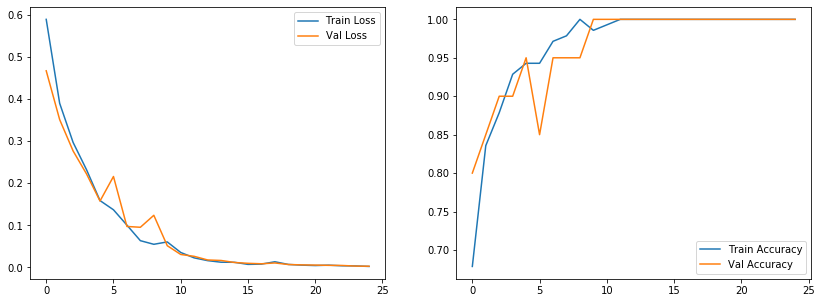

In [19]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history1.history['loss'], label='Train Loss')
ax1.plot(history1.history['val_loss'], label='Val Loss')
ax1.legend()
ax2.plot(history1.history['accuracy'], label='Train Accuracy')
ax2.plot(history1.history['val_accuracy'], label='Val Accuracy')
ax2.legend()